# Solving real world data science tasks with Python Pandas
https://www.youtube.com/watch?v=eMOA1pPVUc4&t=54s&ab_channel=KeithGalli

In [1]:
import pandas as pd
import os

#### Task 1: Merging 12 months of sales data into a single CSV file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
# df.head()

all_months_data = pd.DataFrame()

files = [file for file in os.listdir('./Sales_Data')]

for file in files:
#     print(file)
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
# all_data.head()

### Clean up the data!

#### Drop rows of NaN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
# nan_df.head()

all_data = all_data.dropna(how='all')
# all_data.head()

#### Find 'Or' and delete it

In [5]:
temp_data = all_data[all_data['Order Date'].str[0:2] == 'Or']
# temp_data.head()

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
# all_data.head()

#### Convert columns to the correct type

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Make int, know what you want 
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Make Float

### Augment data with additional columns

#### Task 2: Add Month Column

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Task 3: Add a sales column

In [17]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
# all_data.head()


#### Task 4: Add a city column

In [27]:
# Let's use .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# Lambda - use the cell content
# F String - interpolation
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

# inplace will just replace in the data array without needing to set it somewhere
# all_data.drop(columns='Column', inplace=True)

# There is like duplicate cities

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


#### Question 1: What was the best month for sales? How much was earned that month?

In [11]:
results = all_data.groupby('Month').sum()

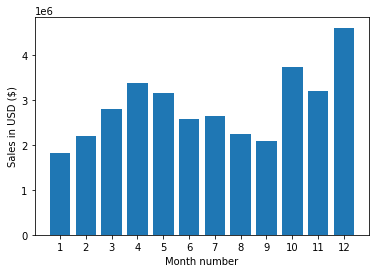

In [13]:
import matplotlib.pyplot as plt

# Inclusive
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

plt.show()

#### Question 2: What city had the highest number of sales

In [35]:
# Need to augment the data

results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


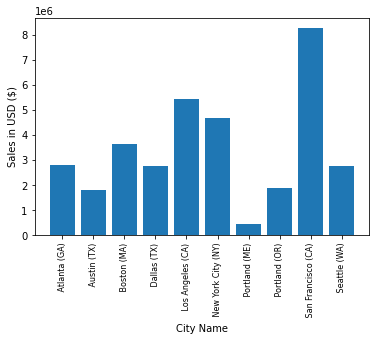

In [42]:
import matplotlib.pyplot as plt

# Inclusive
# Get city in the same order that was done by group by sum. 
# Got the right looking charts with the keys set right
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical',size=8)
plt.xticks(cities)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')

plt.show()

# Understand your data
# Why is Portland the lowest? Is it a small city?
# Why is SF the highest? Is it a tech city?

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [48]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.drop(columns='Order Data', inplace=True)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [49]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


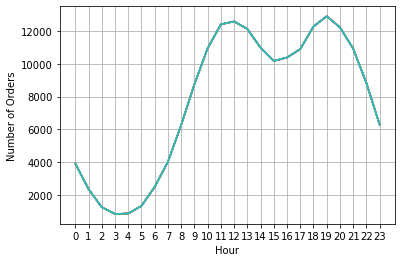

In [53]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.grid()

plt.ylabel('Number of Orders')
plt.xlabel('Hour')

plt.show()
# 11am, 7pm - peak time people make orders

#### Question 4: What products are most often sold together?

In [57]:
# Stripped the data to just the orders that are duplicated, see what is paired up
fd = all_data[all_data['Order ID'].duplicated(keep=False)]

# fd.head(20)

fd['Grouped'] = fd.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# fd.head()

fd = fd[['Order ID', 'Grouped']].drop_duplicates()

fd.head()

<ipython-input-57-f4f8bf3e6b14>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['Grouped'] = fd.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [60]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
# Be smart with promotions, lure in bigger combo

from itertools import combinations
from collections import Counter

count = Counter()

for row in fd['Grouped']:
    row_list = row.split(',')
    
    # Change to 3 from 2, combo of 3 items
    count.update((Counter(combinations(row_list, 2))))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most?

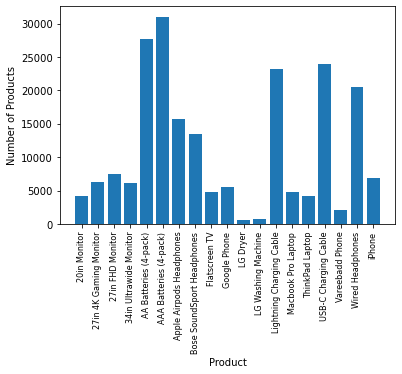

In [65]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']


products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xticks(products, rotation='vertical',size=8)

plt.ylabel('Quantity Ordered')
plt.xlabel('Product')

plt.show()